# Data collection and Preprocessing

In [ ]:
# !pip install everywhereml>=0.0.3

In [1]:
from everywhereml.data import Dataset
from everywhereml.data.collect import SerialCollector
water_dataset = Dataset.from_csv('dataset.csv', name='kolam', target_name_column='target_name')

In [2]:
water_dataset.describe()

,Suhu,pH,Turbidity,target
count,90.000000,90.000000,90.000000,90.000000
mean,28.609222,8.133556,987.026333,1.000000
std,0.953811,0.970424,652.995460,0.821071
min,25.930000,6.560000,127.880000,0.000000
25%,27.977500,6.965000,397.685000,0.000000
50%,28.655000,8.455000,875.285000,1.000000
75%,29.430000,8.950000,1411.415000,2.000000
max,29.940000,9.650000,2851.470000,2.000000


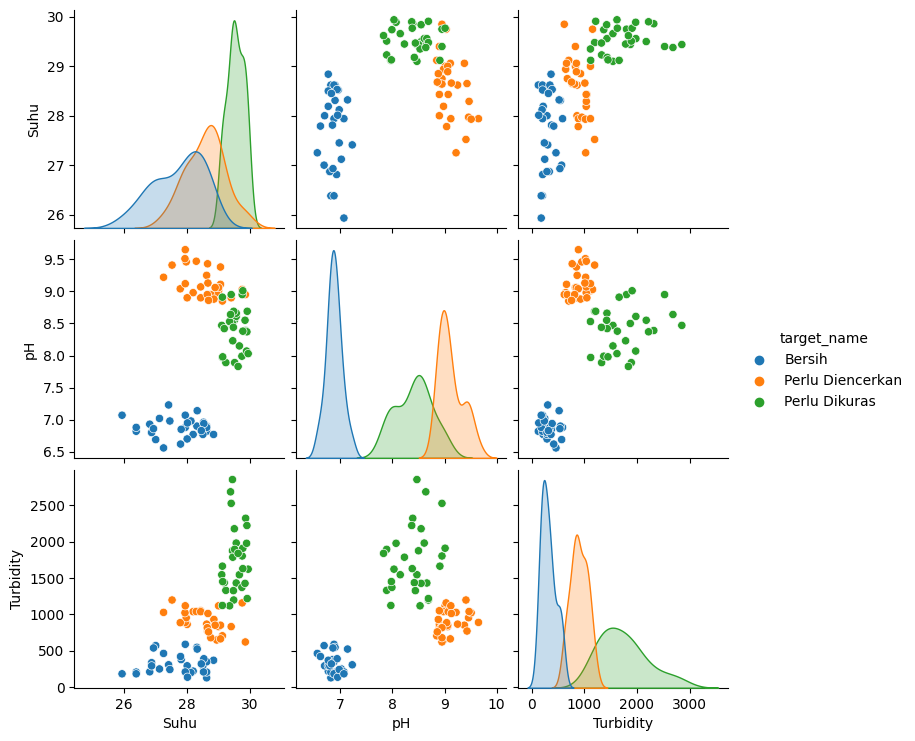

In [3]:
"""
Plot features pairplot
"""
water_dataset.plot.features_pairplot()

In [4]:
"""
Create a pipeline for feature pre-processing
"""
from everywhereml.preprocessing import Pipeline, MinMaxScaler

Water_pipeline = Pipeline(name='WaterPipeline', steps=[
    MinMaxScaler()
])

In [5]:
"""
Apply the pipeline to our dataset
"""
water_dataset.apply(Water_pipeline)

In [6]:
water_dataset.describe()

,Suhu,pH,Turbidity,target
count,90.000000,90.000000,90.000000,90.000000
mean,0.668135,0.509241,0.315446,1.000000
std,0.237858,0.314053,0.239755,0.821071
min,0.000000,0.000000,0.000000,0.000000
25%,0.510599,0.131068,0.099062,0.000000
50%,0.679551,0.613269,0.274419,1.000000
75%,0.872818,0.773463,0.471266,2.000000
max,1.000000,1.000000,1.000000,2.000000


## Port C For Normalize Data

In [7]:
"""
Port pipeline to C++
"""
print(Water_pipeline.to_arduino_file(
    'Normalize/Pipeline.h', 
    instance_name='pipeline'
))

#ifndef UUID2394018014640
#define UUID2394018014640

#include <cstring>


namespace WaterPipeline {

    
        #ifndef UUID2393994300336
#define UUID2393994300336

/**
  * MinMaxScaler(low=0, high=1)
 */
class Step0 {
    public:

        /**
         * Transform input vector
         */
        bool transform(float *x) {
            
    for (uint16_t i = 0; i < 3; i++) {
        x[i] = (x[i] - offset[i]) * scale[i] + 0;

        if (x[i] < 0) x[i] = 0;
        else if (x[i] > 1) x[i] = 1;
    }

    return true;


            return true;
        }

    protected:
        
    float offset[3] = {25.93000000000f, 6.56000000000f, 127.88000000000f};
    float scale[3] = {0.24937655860f, 0.32362459547f, 0.00036716246f};

};



#endif
    

     /**
      * Pipeline:
 * ---------
 *  > MinMaxScaler(low=0, high=1)
     */
    class Pipeline {
        public:
            static const uint16_t NUM_INPUTS = 3;
            static const uint16_t NUM_OUTPUTS = 3;
            static const uint